# 20240125

## 사이킷런의 model_selection 모듈
model_selection 모듈은 머신러닝 모델을 개발하고 평가하는 데 유용한 도구입니다. model_selection 모듈을 사용하면 데이터를 더 잘 이해하고 더 나은 모델을 개발할 수 있습니다.
- 학습 데이터와 테스트 데이터를 분리하거나 교차 검증, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위해서 다양한 함수와 클래스를 제공합니다.

- 학습 데이터와 테스트 데이터를 분리하는 방법에는 여러 가지가 있습니다. 가장 일반적인 방법은 train_test_split() 함수를 사용하는 것입니다. train_test_split() 함수는 학습 데이터와 테스트 데이터를 70:30의 비율로 분리합니다.

- 교차 검증은 모델의 성능을 평가하는 방법입니다. 교차 검증은 데이터를 여러 개의 폴드로 분리한 다음 각 폴드를 테스트 데이터로 사용하고 나머지 폴드를 학습 데이터로 사용하여 모델을 학습하는 방법입니다. 교차 검증은 모델의 성능을 더 정확하게 평가할 수 있습니다.

- Estimator의 하이퍼 파라미터를 튜닝하는 방법에는 여러 가지가 있습니다. 가장 일반적인 방법은 GridSearchCV() 함수를 사용하는 것입니다. GridSearchCV() 함수는 주어진 하이퍼 파라미터의 모든 조합에 대해 모델을 학습하고 평가하여 가장 좋은 하이퍼 파라미터를 찾습니다.


### 학습/테스트 데이터 셋 분리 - train_test_split()
- 첫번째 파라미터로 피처 데이터 세트, 두번째 파라미터로 레이블 데이터 세트를 입력 받는다.
- 선택적 파라미터로 test_size(디폴트는 0.25), shuffle(디폴트는 True), random_state를 입력 받는다.
- train_test_split()의 반환값은 튜플 형태이다.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.3, random_state=10)

In [3]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9778


### 교차 검증이 필요한 이유

- 교차 유효성 검사는 독립적인 데이터 세트에서 모델의 성능을 평가하고 과적합을 방지하기 위해 기계 학습에 사용되는 통계 기법으로 다음과 같은 이유로 중요합니다.
    - 과적합: 과적합은 모델이 노이즈나 이상값을 포함하여 훈련 데이터를 너무 잘 학습할 때 발생합니다. 이러한 경우 모델은 학습 데이터에 대해 뛰어난 정확도를 갖지만 보이지 않는 데이터에 대해서는 성능이 저하될 수 있습니다. 교차 검증은 보다 일반화된 성능 메트릭을 제공하여 과적합을 방지하는 데 도움이 됩니다.
    - 하이퍼파라미터 조정: 교차 검증은 일반적으로 그리드 검색 또는 기타 하이퍼파라미터 튜닝 방법과 함께 사용되어 최상의 성능을 가진 모델을 생성하는 하이퍼파라미터를 찾습니다.
    - 모델 비교: 여러 모델을 비교할 때 교차 검증은 서로 다른 데이터 하위 집합의 성능을 평균화하므로 보다 신뢰할 수 있는 비교를 제공하는 데 도움이 됩니다.

- 교차 검증 방법 : k-겹 교차 검증
    - 데이터세트 분할: 전체 데이터세트를 'k'개의 동일한 부분(또는 '접기')으로 나눕니다. k=5를 선택한다고 가정해 보겠습니다. 즉, 데이터를 5개의 하위 집합으로 나눕니다.
    - 훈련 및 테스트: 하나의 하위 집합을 테스트 세트로 유지하고 나머지 k-1 하위 집합에서 모델을 훈련합니다.
    - 평가: 테스트 세트에서 모델의 성능 메트릭(예: 문제에 따라 정확도, 정밀도, 재현율, F1 점수 등)을 계산합니다.
    - 반복: 이 프로세스를 k번 반복합니다. 매번 다른 하위 집합을 테스트 세트로 사용하고 나머지 하위 집합을 훈련 세트로 사용합니다.
    - 평균 성능: k 반복에 대한 성능 메트릭의 평균을 계산합니다. 이는 모델의 교차 유효성 검사 점수로, 성능에 대한 보다 일반화된 척도를 제공합니다.

- 교차 유효성 검사의 기본 아이디어는 학습용 데이터에 대해 학습하고 검증용 데이터로 테스트할 때 얻은 "점수"가 새로운 데이터에서 모델이 수행되는 방식을 나타낼 가능성을 더 높다는 것입니다.
- Python에서는 sklearn.model_selection 모듈의 cross_val_score 함수를 사용하여 교차 검증을 쉽게 수행할 수 있습니다.

### 교차 검증 기술
- 기계 학습 모델을 학습할 때 학습 데이터에서 학습된 패턴을 기반으로 새로운 보이지 않는 데이터에 대해 정확한 예측을 할 수 있는 모델을 만들려고 합니다. 문제는 모델을 실제로 테스트하기 전에는 본 적이 없는 데이터에서 모델이 얼마나 잘 작동할지 알 수 없다는 것입니다.
- 교차 유효성 검사에는 전체 데이터 세트를 모델 훈련을 위한 더 큰 섹션과 모델 테스트를 위한 더 작은 섹션의 두 섹션으로 나누는 작업이 포함됩니다.
- '트레이닝 세트'는 데이터의 기본 패턴에 대해 모델을 가르치는 데 사용됩니다. 반면 '테스트 세트'는 모델이 이러한 패턴을 얼마나 잘 학습했는지 평가하는 데 사용됩니다. 모델은 교육 중에 테스트 데이터를 본 적이 없으므로 테스트 세트는 '보이지 않는 새로운 데이터'로 작동합니다.
- 이제 이 작은 부분(테스트 세트)에서 모델을 테스트할 때 얻은 "점수"는 모델이 미래에 실제 보이지 않는 데이터에서 얼마나 잘 수행될 것인지에 대한 추정치로 사용됩니다.
- 서로 다른 데이터 하위 집합(교차 유효성 검사의 핵심)에 대해 이 프로세스를 여러 번 반복함으로써 새 데이터로 일반화하는 모델의 능력에 대해 보다 신뢰할 수 있는 추정치를 얻습니다.
- 즉, 대부분의 데이터(훈련 세트)에서 모델을 훈련한 다음 데이터의 작은 부분(테스트 세트)에서 테스트함으로써 모델이 얼마나 잘 수행될 가능성이 있는지 보다 정확한 측정값을 얻을 수 있습니다. 완전히 새로운 데이터를 만나면 수행합니다.

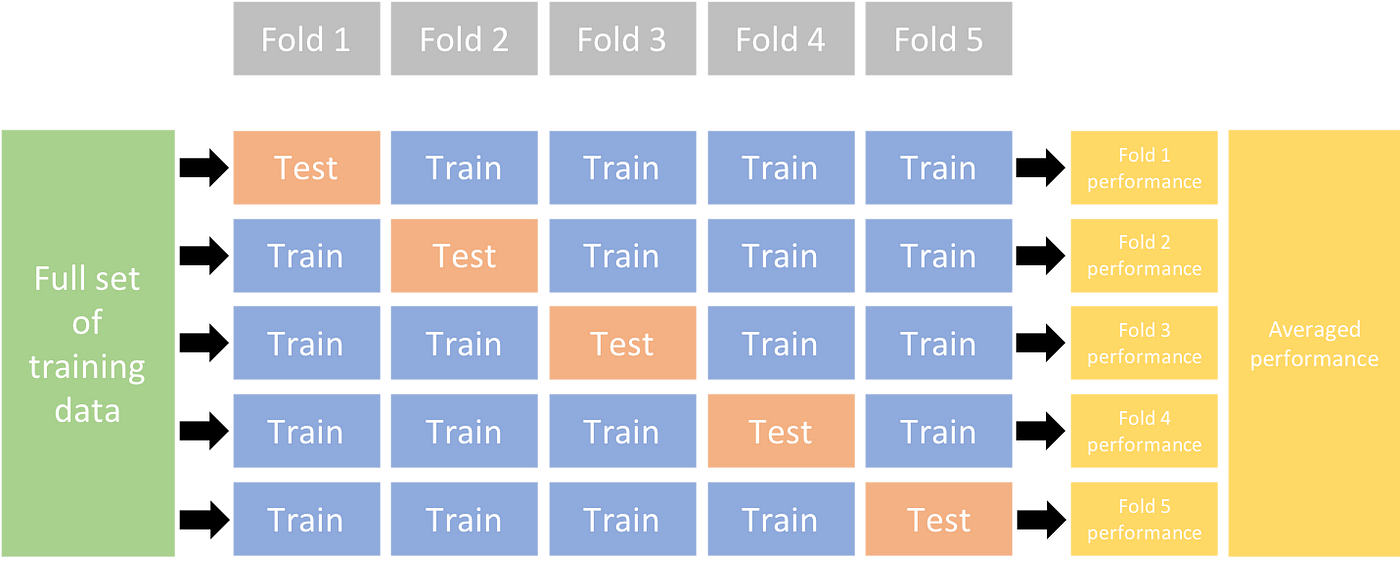

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [7]:
n_iter = 0

# KFold객체의 split() 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test,pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


#### 그냥 KFold 만 쓸 경우
붓꽃 데이터 세트는 150개의 데이터 포인트를 가지고 있으며, 각 클래스(붓꽃의 종류)마다 50개의 데이터 포인트가 있다. 이 데이터는 종류별로 정렬되어 있기 때문에, KFold로 단순히 처음부터 데이터를 3개의 폴드로 나누면, 각 폴드는 특정 종류의 붓꽃만을 포함하게 된다. 예를 들어, 첫 번째 폴드는 첫 번째 종류의 붓꽃만, 두 번째 폴드는 두 번째 종류의 붓꽃만 포함하게 되는 것이다.

이런 분할 방식으로 인해 학습 데이터와 테스트 데이터가 완전히 다른 종류의 붓꽃만을 포함하게 되어, 모델이 적절히 학습되지 못하고 정확도가 0이 되는 결과를 초래

- 인덱스가 순서대로 배분됨

Q. K값을 3으로 설정하여 각각 교차 검증을 수행하세요.

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 3r개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=3)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])


n_iter= 0
# KFold객체의 split() 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test,pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

붓꽃 데이터 세트 크기: 150

#1 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

#2 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]

#3 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.0


#### KFold shuffle

In [21]:
# 셔플 추가~
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 3r개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
# kfold = KFold(n_splits=3)
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])


n_iter= 0
# KFold객체의 split() 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test,pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

붓꽃 데이터 세트 크기: 150

#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  4   9  10  11  12  15  16  18  19  22  26  27  29  30  31  32  36  42
  45  51  55  56  64  65  68  69  73  75  76  78  81  82  85  86 104 108
 109 110 118 127 128 131 132 133 137 141 142 143 145 146]

#2 교차 검증 정확도 :0.92, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[  0   5   7   8  13  23  24  25  28  33  34  35  39  40  43  44  47  49
  53  60  62  66  67  70  77  80  83  84  89  93  94  95  96  97  98 101
 105 111 113 114 117 119 120 122 123 125 134 135 138 148]

#3 교차 검증 정확도 :0.92, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[  1   2   3   6  14  17  20  21  37  38  41  46  48  50  52  54  57  58
  59  61  63  71  72  74  79  87  88  90  91  92  99 100 102 103 106 107
 112 115 116 121 124 126 129 130 136 139 140 144 147 149]

## 평균 검증 정확도: 0.94


#### StratifiedKFold
- 위의 경우들과 달리, 각 클래스 (지금은 붓꽃의 3가지 종류 0,1,2)의 숫자가 동일하게 배분된다.

In [20]:
from sklearn.model_selection import StratifiedKFold

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 3r개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
stratified_kfold = StratifiedKFold(n_splits=3)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])


n_iter= 0
# KFold객체의 split() 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in stratified_kfold.split(features, label):
  # kfold.split()으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test,pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

붓꽃 데이터 세트 크기: 150

#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9666666666666667


#### stratify=y vs. StratifiedKFold

stratify=y:

- stratify=y는 데이터를 훈련 세트와 테스트 세트로 분할할 때 클래스 비율을 유지하는 옵션. 이 옵션은 주로 train_test_split 함수와 같은 데이터 분할 함수에서 사용.
- stratify=y를 사용하면 원본 데이터의 클래스 비율을 훈련 세트와 테스트 세트에서도 유지할 수 있다. 예를 들어, 레이블이 0과 1인 두 클래스가 원본 데이터에서 각각 25%, 75%를 차지한다면, stratify=y 옵션을 사용하여 분할하면 훈련 세트와 테스트 세트에서도 각 클래스의 비율이 대략적으로 25%와 75%를 유지하게 된다.

StratifiedKFold:

- StratifiedKFold는 교차 검증을 수행할 때 각 폴드가 원본 데이터의 클래스 분포를 반영.
- StratifiedKFold는 k-폴드 교차 검증의 변형으로, 각 폴드에서의 클래스 비율이 전체 데이터 세트의 클래스 비율을 대표하도록 만든다.
- 이 방법은 주로 모델의 성능을 평가하거나 하이퍼파라미터를 튜닝할 때 사용되며, 데이터가 불균형할 경우 특히 유용. 예를 들어, 5-폴드 교차 검증을 사용할 경우, StratifiedKFold는 각 폴드가 전체 데이터의 클래스 비율을 유지하도록 보장.

결론적으로, stratify=y는 단일 데이터 분할(훈련/테스트 세트 분할)에서 클래스 비율을 유지하는 데 사용되며, StratifiedKFold는 교차 검증에서 각 폴드의 클래스 비율을 유지하는 데 사용. 두 방법 모두 클래스 불균형을 고려하여 보다 신뢰할 수 있는 학습 및 평가를 가능하게 한다.

#### Kfold vs Stratified 예시에 대한 설명

In [22]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [23]:
# kfold 문제 : 학습 label 은 모두 1,2이고 검증 label은 모두 3으로 arrange 될 수 있음
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트르 5번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환.
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [24]:
# StratifiedKFold는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


#### cross_val_score( )
- Scikit-Learn의 cross_val_score() 함수는 기본적으로 회귀 모델에 대해서는 K-Fold 교차 검증 방법을, 분류 모델에 대해서는 Stratified K-Fold 교차 검증 방법을 사용합니다.

- 분류 모델에서 cross_val_score()를 사용하면, 데이터의 클래스 비율을 유지하며 데이터를 나누는 Stratified K-Fold 방식이 기본적으로 적용됩니다.

- 다만, 이는 기본 설정이며, 필요에 따라 cv 파라미터를 사용하여 다른 교차 검증 방법을 지정할 수 있습니다. 예를 들어, cv=KFold(n_splits=5) 와 같이 지정하면 5-Fold 교차 검증을 사용하게 됩니다.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### GridSearchCV
- GridSearchCV는 scikit-learn 라이브러리에서 제공하는 클래스로, 지정된 하이퍼파라미터의 모든 가능한 조합에 대해 교차 검증을 수행하여 최적의 하이퍼파라미터를 찾는 방법.

- 하이퍼파라미터는 머신러닝 모델의 성능을 조절하는 매개변수들이다. 예를 들어, 서포트 벡터 머신(SVM)에서는 마진의 넓이를 조절하는 C나 커널의 종류를 결정하는 kernel 등이 하이퍼파라미터가 된다. 이러한 하이퍼파라미터는 학습 데이터로부터 학습되는 것이 아니라, 사람이 직접 설정해주어야 한다.

- GridSearchCV는 이러한 하이퍼파라미터를 효과적으로 설정하기 위한 도구입니다. 사용자가 지정한 범위 내에서 모든 하이퍼파라미터 조합을 시도하고, 각 조합에 대해 교차 검증을 수행하여 가장 성능이 좋은 조합을 찾는다.

- GridSearchCV의 주요 파라미터는 다음과 같다:
    - estimator: 사용할 머신러닝 모델.
    - param_grid: 하이퍼파라미터의 종류와 시도해 볼 값들을 사전 형태로 지정.
    - scoring: 모델의 성능을 평가하는 지표를 지정.
    - cv: 교차 검증을 수행할 때 데이터를 나누는 폴드의 개수를 지정.
- GridSearchCV를 사용하면, 각각의 하이퍼파라미터 조합에 대해 성능을 자동으로 평가하므로, 수작업으로 각각의 조합을 시도해 볼 필요가 없다. 이는 시간을 절약하고, 또한 객체 지향 프로그래밍 방식을 사용하여 코드를 더욱 간결하고 이해하기 쉽게 만든다.
- 하지만 GridSearchCV는 모든 조합을 시도하므로, 하이퍼파라미터의 개수나 시도해 볼 값의 개수가 많아지면 계산 비용이 크게 증가할 수 있다.

- ! cross_val_score()에 적혀있는 내용과 같이 분류모델은 기본적으로 (자동적으로) stratified, 회귀일 때는 KFold로 적용 되어서 교차검증이 된다.

! 나의 끄적 노트
- Decision Tree의 하이퍼파라미터: 최대 깊이, 최소 샘플 분할, 최소 샘플 리프, 최대 리프 노드, 최대 기능, 기준("gini", "entropy")
- Random Forest 같은 경우는 작은 Decision Tree들이 모여 숲을 이루는 것이니 n_estimator 가 중요한 하이퍼파라미터가 된다.

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# 데이터를 로딩하고 학습데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정 (여기서는 예로 두개를 선택해서 해봄)
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

- 하이퍼파라미터: 분석하는 사람이 정해주는 것
- 파라미터: 컴퓨터가 골라주는 것

In [27]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
# dtree 대신에 random forest 넣고 싶으면 넣고, param 은 n_estimator
# logistic 회귀를 넣을 수도 있다.

# 붓꽃 Train 데이터로 param_grid의 하이퍼파라미터들을 순차적으로 학습/평가.
grid_dtree.fit(X_train, y_train)

print(grid_dtree)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})


In [28]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_) #best_params 함수로 최적 파라미터 뽑을 수 있고
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_)) #best_score_ 함수로 최고 정확도 뽑을 수 있음

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [29]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


! 조금 어려운 방법으로 GridSearchCV 말고 하기의 방법도 있다.
- HyperOPT

##### Q. 와인 데이터에 대해서 아래 사항을 고려하여 모델 생성 및 성능개선을 위한 하이퍼파라미터 튜닝을 수행하세요.
- dt를 알고리즘으로 적용
- cv = 5
- param_grid={'max_depth':[3,4,5,6],'min_samples_split':[2,3,4]}

In [101]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 와인 데이터 불러오기
wine = datasets.load_wine()
X, y = wine.data, wine.target
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [50]:
# 훈련용, 검증용 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121, stratify=y) # stratify=y 훈련용, 검증용 데이터 나눌 대도 stratify를 해주는 것이 좋음. 교차 검증은 자동으로 stratifiedKFold가 되지만
# DT 객체 만들기
winetree = DecisionTreeClassifier(random_state=1) # random_state 안 주면 할때마다 달라짐
# param grid를 dictionary 형태로 설정하기
param_grid={'max_depth':[3,4,5,6],'min_samples_split':[2,3,4]} # 최적 파라미터가 6이 나와서 8을 추가해봐도 6이 나왔음
# GridSearchCV를 사용해서 winetree의 최적의 param_grid 찾고, 테스트 수행. refit=True를 통해서 최적의 파라미터 설정으로 재학습.
grid_dtree = GridSearchCV(winetree, param_grid=param_grid, cv=5, refit=True)
# Train 데이터로 param_grid의 하이퍼파라미터들을 5 fold로 나눠서 순차적으로 학습/평가. (모델 학습 및 교차검증)
grid_dtree.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 4, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9076


In [51]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.8889


###! 하이퍼파라미터를 튜닝해야 하는 경우, GridSearchCV를 사용하면 되고 상대적으로 cross_val_score()를 쓸 일은 없겠다.

##### Q. 타이타닉 생존자 예측 데이터 세트 train.csv에 대하여 다음 사항을 수행하세요.
- 일괄 전처리 사용자 함수 transform_features(df) 작성
- dt, lr, rf 모델링 및 평가(정확도)
- dt_clf , folds=5 적용하여 KFold 교차검증 수행
- dt_clf , cv=5 적용, cross_val_score를 이용하여 교차검증 수행
- GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
  - parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
  - dt_clf, scoring='accuracy', cv=5 적용

In [62]:
from sklearn.preprocessing import LabelEncoder
#### 1. 일괄 전처리 사용자 함수 transform_features(df) 작성

# 추가내용
# null 처리 age를 위한 함수
# if titanic_df['name'].find('Miss.') >= 0: 'Miss.'
# elif titanic_df['name'].find('Mister.') >= 0: 'Mister.'
# elif titanic_df['name'].find('Master.') >=0: 'Master.'
# elif titanic_df['name'].find('Mrs.') >=0: 'Mrs.'
# elif titanic_df['name'].find('Dr.') >=0: 'Dr.'
def address_type (x):
    prefix = ''
    if x.find('Miss.') >= 0: prefix = 'Miss.'
    elif x.find('Mr.') >= 0: prefix = 'Mr.'
    elif x.find('Master.') >=0: prefix = 'Master.'
    elif x.find('Mrs.') >=0: prefix = 'Mrs.'
    elif x.find('Dr.') >=0: prefix = 'Dr.'
    elif x.find('Sir.') >=0: prefix = 'Sir.'
    elif x.find('Rev.') >=0: prefix = 'Rev.'
    elif x.find('Col.') >=0: prefix = 'Col.'
    elif x.find('Ms.') >=0: prefix = 'Ms.'
    elif x.find('Lady.') >=0: prefix = 'Lady.'
    elif x.find('Mme.') >=0: prefix = 'Mme.'
    elif x.find('Major.') >=0: prefix = 'Major.'
    elif x.find('Capt.') >=0: prefix = 'Capt.'
    elif x.find('Mlle.') >=0: prefix = 'Mlle.'
    elif x.find('Dona.') >=0: prefix = 'Dona.'
    elif x.find('Jonkheer.') >=0: prefix = 'Jonkheer.'
    elif x.find('Countess.') >=0: prefix = 'Countess.'
    elif x.find('Don.') >=0: prefix = 'Don.'
    else: prefix = 'Not mentioned'
    return prefix

# Null 처리 함수
# Age(평균), Cabin('N'), Embarked('N'), Fare(0)
def fillna(df):
  # 추가내용
  # age null 값 처리
  # df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['prefix'] = df['Name'].apply(lambda x:address_type(x))
  prefix_group = df.groupby('prefix')
  age_mean_series = prefix_group.Age.mean()
  age_null = df[df['Age'].isnull()].index.tolist()
  for x in age_null:
    df.loc[x,'Age'] = age_mean_series[df.loc[x,'prefix']]
  df.drop(['prefix'],axis=1, inplace=True)
  # 나머지 null 값 처리
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
# PassengerId, Name, Ticket(티켓번호)
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)
  return df

# 레이블 인코딩 수행.
# Cabin(선실번호 첫문자만 추출 후 인코딩), Sex(성별), Embarked(중간 정착 항구)
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [70]:
# 데이터 불러와서 titanic_df 데이터프레임으로 만들기
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

drive.mount('/content/drive')

titanic_df = pd.read_csv('/content/drive/MyDrive/KITA_1026/m5_ml/dataset/train.csv')
titanic_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
# X, y 나누고 전처리
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

In [73]:
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [76]:
#### 2.1 train,test 8:2로 나누고 LogisticRegression 모델링, 그리고 정확도
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.8436


In [74]:
#### 2.2 train, test 8:2로 나누고 DecisionTree 모델링, 그리고 정확도
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 - 학습 수행 후에는 dt_clf가 예측능력을 가지게 됨. 그 전에는 학습하기 전.
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.7989


In [77]:
#### 2.3 train, test 8:2로 나누고 RandomForest 모델링, 그리고 정확도
from sklearn.ensemble import RandomForestClassifier

X_train , X_test , y_train , y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2,  random_state=11)

# Create a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=11)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,y_pred)))

예측 정확도: 0.8547


In [81]:
#### 3. dt_clf , folds=5 적용하여 KFold 교차검증 수행
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 5개
kfold = KFold(n_splits=5)
# kfold = KFold(n_splits=5,shuffle=True, random_state=11)
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, scoring = 'accuracy', cv=kfold)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.743  0.764  0.8034 0.7809 0.809 ]
평균 검증 정확도: 0.7801


In [82]:
#### 4. dt_clf , cv=5 적용, cross_val_score를 이용하여 교차검증 수행
# 이 경우는 decisiontree가 분류모델이니깐 StratifiedKFold를 자동으로 선택하게 된다.
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, scoring = 'accuracy', cv=5)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.7709 0.8034 0.8202 0.764  0.8146]
평균 검증 정확도: 0.7946


In [105]:
#### 5. GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
# parameters = {'max_depth':[2,3,4,5,6,7,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,7,8,9,10]}
# dt_clf, scoring='accuracy', cv=5 적용
# 학습데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11) #stratify=y 왜 에러나지..

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5, refit=True)

# Train 데이터로 param_grid의 하이퍼파라미터들을 순차적으로 학습/평가.
grid_dtree.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_) #best_params 함수로 최적 파라미터 뽑기
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_)) #best_score_ 함수로 최고 정확도 뽑을 수 있음

# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))


GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8048
테스트 데이터 세트 정확도: 0.8715
